In [21]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics



import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn import linear_model
from sklearn import svm

In [22]:
file = pd.read_csv('../framinghan_function/framingham-score-risk.csv')
df   = pd.DataFrame(file)

In [23]:
df

,age,gender,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,fram_score,risk,risk_group
0,50.0,2,22.0,110,80,1,1,0,0,1,0,3,0.05,2
1,55.0,1,35.0,140,90,3,1,0,0,1,1,12,0.13,4
2,52.0,1,24.0,130,70,3,1,0,0,0,1,9,0.08,3
3,48.0,2,29.0,150,100,1,1,0,0,1,1,5,0.08,3
4,48.0,1,23.0,100,60,1,1,0,0,0,0,0,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,27.0,120,80,1,1,1,0,1,0,5,0.08,3
69996,62.0,1,50.0,140,90,2,2,0,0,1,1,15,0.20,5
69997,52.0,2,31.0,180,90,3,1,0,1,0,1,9,0.20,5
69998,61.0,1,27.0,135,80,1,2,0,0,0,1,12,0.13,4


In [24]:
print(df.risk.loc[df.risk<=0.03].value_counts().sum())
print(df.risk.loc[(df.risk>=0.03) & (df.risk<=0.05)].value_counts().sum())
print(df.risk.loc[(df.risk>=0.05) & (df.risk<=0.08)].value_counts().sum())
print(df.risk.loc[(df.risk>=0.08) & (df.risk<=0.15)].value_counts().sum())
print(df.risk.loc[df.risk>=0.15].value_counts().sum())

12180
20800
31774
22876
7643


In [25]:
df.describe()


,age,gender,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,fram_score,risk,risk_group
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,27.548886,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,6.170114,0.080021,2.841271
std,6.765294,0.476838,6.099019,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,3.682076,0.055505,1.202562
min,30.000000,1.000000,3.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.010000,1.000000
25%,48.000000,1.000000,24.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.050000,2.000000
50%,54.000000,1.000000,26.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.070000,3.000000
75%,58.000000,2.000000,30.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.100000,4.000000
max,65.000000,2.000000,299.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.600000,5.000000


In [26]:
df = df.drop(columns = ['ap_hi', 'ap_lo', 'cholesterol', 'cardio', 'fram_score', 'risk'])

In [27]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,50.0,2,22.0,1,0,0,1,2
1,55.0,1,35.0,1,0,0,1,4
2,52.0,1,24.0,1,0,0,0,3
3,48.0,2,29.0,1,0,0,1,3
4,48.0,1,23.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
69995,53.0,2,27.0,1,1,0,1,3
69996,62.0,1,50.0,2,0,0,1,5
69997,52.0,2,31.0,1,0,1,0,5
69998,61.0,1,27.0,2,0,0,0,4


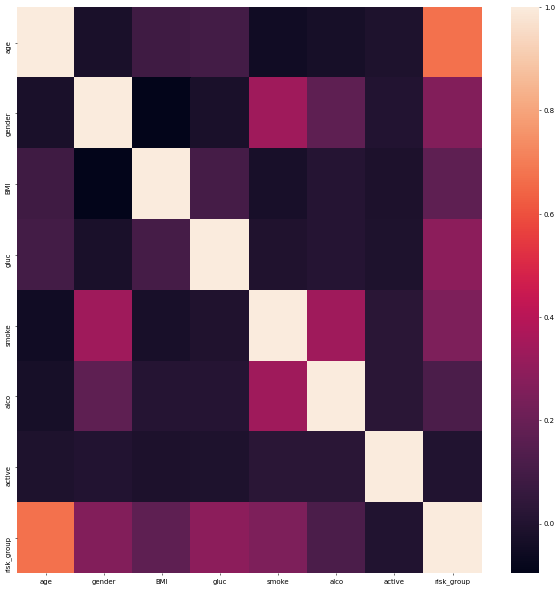

In [28]:
plt.figure(figsize= (15,15), dpi=50)
sns.heatmap(df.corr())

In [29]:
X = df.drop(["risk_group"], axis=1)
y = df["risk_group"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.2,
                                    random_state=158)

In [30]:
X_train.shape

(56000, 7)

In [32]:
model = KNeighborsClassifier(algorithm='brute',leaf_size= 1,n_jobs= -1,
                             n_neighbors= 25,weights= 'uniform')
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred,y_test))

Accuracy: 0.6114285714285714
Confusion Metrix:
 [[2070  387   82   18    0]
 [ 363 1830  887  234   28]
 [  49  530 2777 1246  208]
 [   1   69  609 1208  325]
 [   2    4   89  309  675]]


In [34]:
f = open("knn-5p-best-seed", "a")
print("Best Seed Parameters:\n",score_list.index(max(score_list)), file=f)
print("Accuracy:",max(score_list), file=f)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred,y_test), file=f)
f.close()

# Looking for the best seed

0
0.6023571428571428
#################################

1
0.5978571428571429
#################################

2
0.5998571428571429
#################################

3
0.5933571428571428
#################################

4
0.5965
#################################

5
0.5985
#################################

6
0.5925714285714285
#################################

7
0.5979285714285715
#################################

8
0.5937142857142857
#################################

9
0.5952142857142857
#################################

10
0.5990714285714286
#################################

11
0.5962142857142857
#################################

12
0.6022142857142857
#################################

13
0.5950714285714286
#################################

14
0.6012142857142857
#################################

15
0.6
#################################

16
0.6028571428571429
#################################

17
0.6026428571428571
#################################

18
0.5957857142857143
#

148
0.5962142857142857
#################################

149
0.6015
#################################

150
0.6083571428571428
#################################

151
0.5992142857142857
#################################

152
0.5947142857142858
#################################

153
0.6002857142857143
#################################

154
0.5946428571428571
#################################

155
0.5947857142857143
#################################

156
0.6
#################################

157
0.5964285714285714
#################################

158
0.6114285714285714
#################################

159
0.5948571428571429
#################################

160
0.6055
#################################

161
0.5995714285714285
#################################

162
0.598
#################################

163
0.6008571428571429
#################################

164
0.6024285714285714
#################################

165
0.6002142857142857
#################################

166
0.60

295
0.5964285714285714
#################################

296
0.6012857142857143
#################################

297
0.5967142857142858
#################################

298
0.6013571428571428
#################################

299
0.6007142857142858
#################################



Text(0, 0.5, 'testing accuracy')

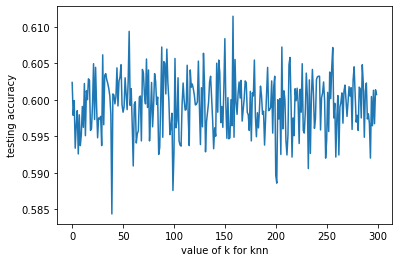

In [6]:
rand_seed = list(range(300))
score_list = []

X = df.drop(["risk_group"], axis=1)
y = df["risk_group"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

for i in rand_seed:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    model = KNeighborsClassifier(algorithm= 'brute', 
                                 leaf_size= 1,
                                 n_jobs= -1,
                                 n_neighbors= 25,
                                 weights= 'uniform')
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(i)
    print(accuracy_score(y_pred, y_test))
    print('#################################\n')
    score_list.append(accuracy_score(y_pred, y_test))
    
plt.plot(rand_seed, score_list)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')

In [38]:
print(max(score_list))
print(score_list.index(max(score_list)))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred,y_test))

0.6114285714285714
158
Confusion Metrix:
 [[2070  387   82   18    0]
 [ 363 1830  887  234   28]
 [  49  530 2777 1246  208]
 [   1   69  609 1208  325]
 [   2    4   89  309  675]]


In [8]:
f = open("knn-5p-best-seed", "a")
print("Best Seed Parameters:\n",score_list.index(max(score_list)), file=f)
print("Accuracy:",max(score_list), file=f)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test), file=f)
f.close()

158

# TRAINING THE MODEL

Inspiration: https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':list(range(1,26,2)),
          'leaf_size' : [1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]
        }
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 25, 'weights': 'uniform'}
Accuracy: 0.5990714285714286
Confusion Metrix:
 [[2066  402   88   13    0]
 [ 351 1733  843  181   25]
 [  73  635 2691 1221  223]
 [   1   91  698 1203  352]
 [   2    4   85  325  694]]


In [15]:
f = open("knn-5p-best-score", "a")
    print("Best Hyper Parameters:\n",model1.best_params_, file=f)
print("Accuracy:",metrics.accuracy_score(prediction,y_test), file=f)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test), file=f)
f.close()